In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Raw data access
import os
os.chdir('/content/drive/MyDrive/Meta_Analysis_Ajit_Sir/ML_24_Dec/')

In [3]:
!pip install pycaret scipy == 1.9.3

ERROR: Invalid requirement: '==': Expected package name at the start of dependency specifier
    ==
    ^


In [4]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.1 MB/s eta 0:00:00


In [4]:
from glob import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
ls

5_X_Normalized_Data_final_GSE233233_QZ_006.csv  ML_code_9_oct_31_Dec.ipynb
Boludo/                                         Normalized_Data_final_GSE233233_QZ_006.csv
Count_Data_final_GSE233233_QZ_006.csv           Tom/
GSE233233_Zhongza_9/                            Tom_Ex/
hTree_GSE233233_QZ_006_5_X.pdf                  t-SNE_GSE233233_QZ_006_All.pdf
Meta_Data_final_GSE233233_QZ_006.csv


# **Ajit_Sir_PCA_UMAP_Tsne_Htree_Dec_31_24**

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42  # Ensures text is stored as text, not outlines
mpl.rcParams['ps.fonttype'] = 42  # Same for PS files

# Set random seed for reproducibility
random_seed = 123

# Function to load and preprocess data
def load_data(count_matrix_file, metadata_file):
    # Load count matrix
    count_matrix = pd.read_csv(count_matrix_file, index_col=0)
    # Transpose to have samples as rows and genes as columns
    count_matrix = count_matrix.T

    # Load metadata
    metadata = pd.read_csv(metadata_file)

    # Merge metadata with count matrix
    merged_df = count_matrix.merge(metadata, left_index=True, right_on='SampleID')
    return merged_df

# Function for visualization using dimensionality reduction and clustering
def visualize_dim_reduction(df):
    X = df.drop(columns=['SampleID', 'condition'])  # Exclude metadata columns
    y = df['condition']  # Target variable (condition)

    # --- PCA ---
    pca = PCA(n_components=2, random_state=random_seed)
    pca_result = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    pca_df['condition'] = y.values

    # Plot PCA
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='condition', data=pca_df, palette='viridis', s=100)
    for i, sample_name in enumerate(df['SampleID']):
       plt.annotate(sample_name,
                 (pca_df['PCA1'][i], pca_df['PCA2'][i] + 0.1),  # Exactly at the circle's center
                 fontsize=6,  # Smaller font size
                 weight='bold',  # Bold font
                 ha='center',  # Horizontal alignment center
                 va='bottom',  # Vertical alignment center
                 alpha=0.75)
    plt.title('PCA of Gene Expression Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Condition')
    plt.show()

    # --- t-SNE ---
    def set_perplexity(n_samples):
        """Set appropriate perplexity based on the number of samples."""
        return min(30, max(5, n_samples // 3))

    # Get appropriate perplexity
    n_samples = X.shape[0]
    perplexity_value = set_perplexity(n_samples)

    tsne = TSNE(n_components=2, perplexity=perplexity_value, n_iter=300, random_state=random_seed)
    tsne_result = tsne.fit_transform(X)
    tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
    tsne_df['condition'] = y.values

    # Plot t-SNE
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='condition', data=tsne_df, palette='viridis', s=80)
    for i, sample_name in enumerate(df['SampleID']):
      plt.annotate(sample_name,
                 (tsne_df['TSNE1'][i], tsne_df['TSNE2'][i] + 1.4),  # Slightly above the circle
                 fontsize=6,  # Smaller font size
                 weight='bold',  # Bold font
                 ha='center',  # Horizontal alignment center
                 va='bottom',  # Vertical alignment for positioning above
                 alpha=0.75)
    plt.title('t-SNE of Gene Expression Data')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.legend(title='Condition')

    plt.show()

    # --- UMAP ---
    import warnings
    warnings.filterwarnings("ignore", category=UserWarning, message="n_jobs value.*")
    umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=random_seed)
    umap_result = umap_model.fit_transform(X)
    umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['condition'] = y.values

    # Plot UMAP
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='condition', data=umap_df, palette='viridis', s=80)
    for i, sample_name in enumerate(df['SampleID']):
       plt.annotate(sample_name,
                 (umap_df['UMAP1'][i], umap_df['UMAP2'][i] + 0.03),  # Slightly above the circle
                 fontsize=6,  # Smaller font size
                 weight='bold',  # Bold font
                 ha='center',  # Horizontal alignment center
                 va='bottom',  # Vertical alignment for positioning above
                 alpha=0.75)
    plt.title('UMAP of Gene Expression Data')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.legend(title='Condition')
    # Save the plot as a PDF
    plt.savefig("Umap_GSE233233_QZ_006_All.pdf", format="pdf")
    plt.show()

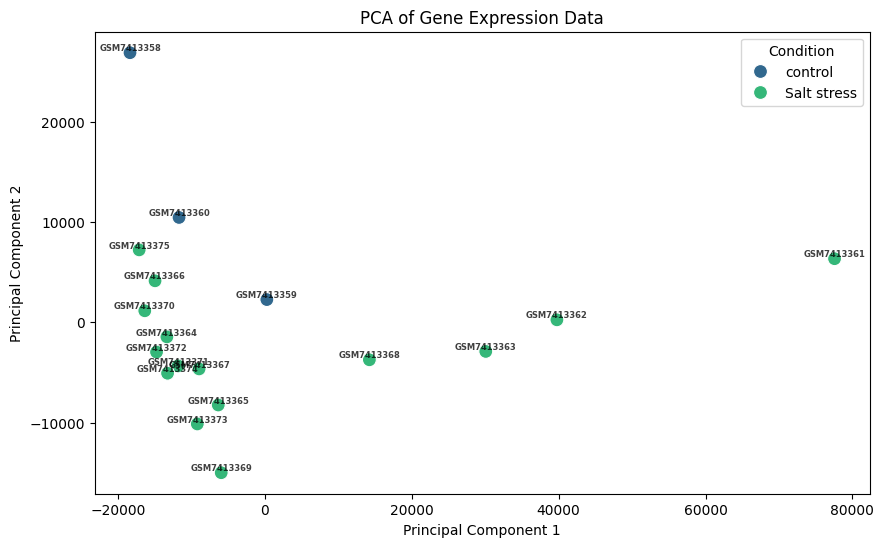

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


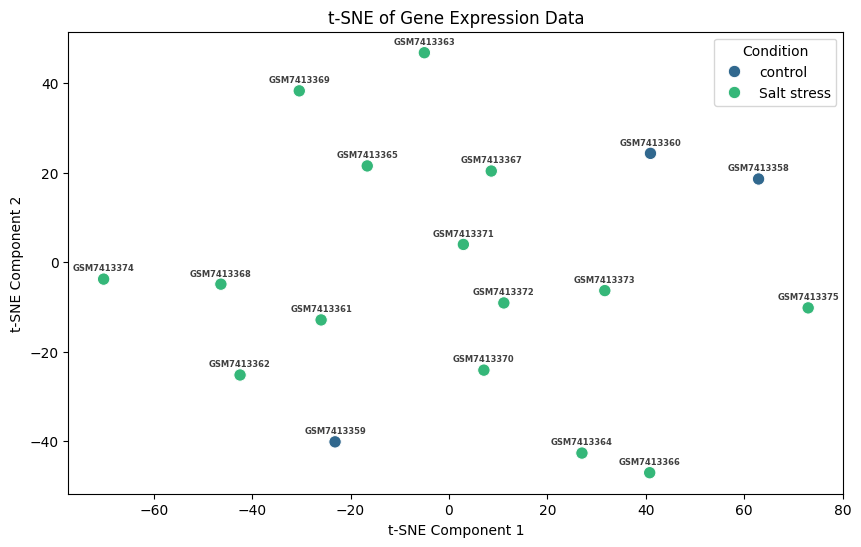

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


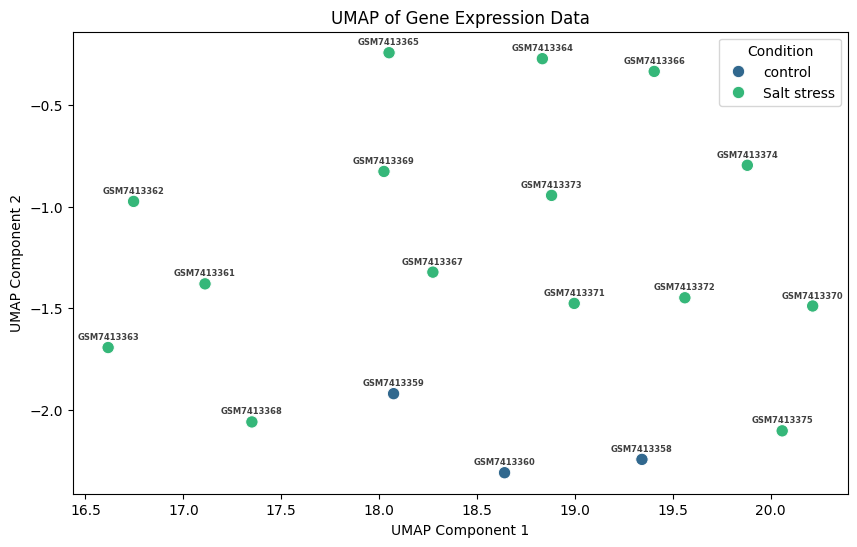

In [11]:
# Example Usage
# Replace with paths to your count matrix and metadata files
count_matrix_file = 'Count_Data_final_GSE233233_QZ_006.csv'
metadata_file = 'Meta_Data_final_GSE233233_QZ_006.csv'

# Load and visualize data
df = load_data(count_matrix_file, metadata_file)
visualize_dim_reduction(df)

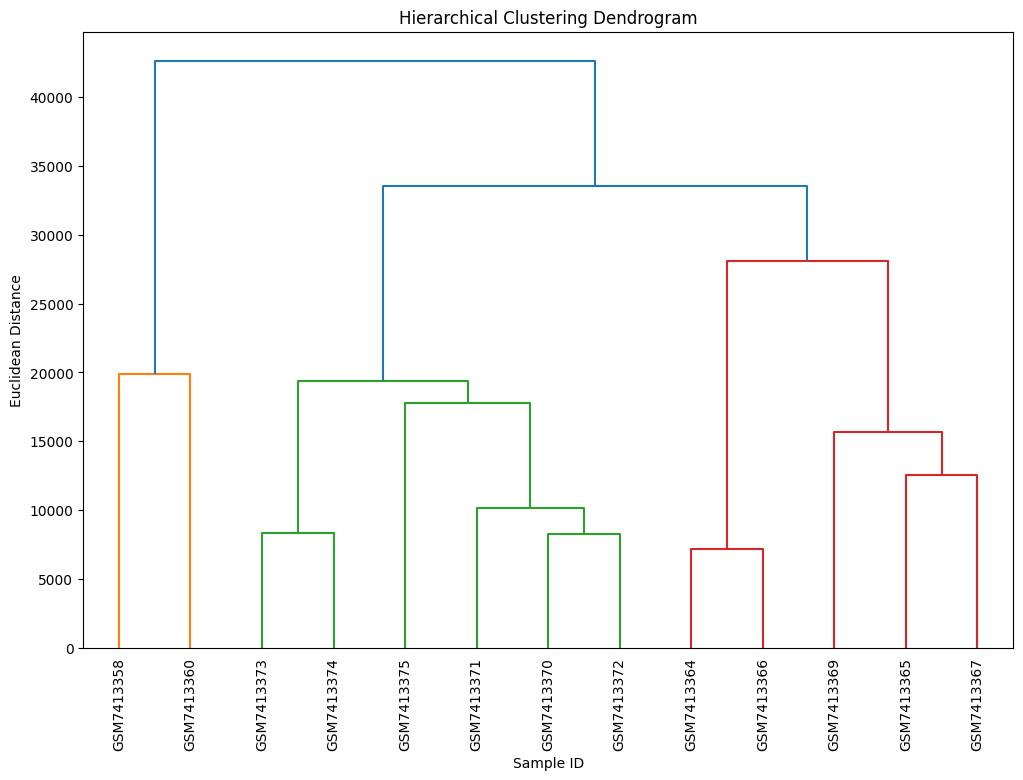

In [12]:
def plot_hierarchical_tree(df):
    # Drop metadata columns to retain only expression data
    X = df.drop(columns=['SampleID', 'condition'])

    # Calculate pairwise distances
    distance_matrix = pdist(X, metric='euclidean')

    # Perform hierarchical clustering
    linkage_matrix = linkage(distance_matrix, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(12, 8))
    dendrogram(
        linkage_matrix,
        labels=df['SampleID'].values,
        leaf_rotation=90,  # Rotate labels for better readability
        leaf_font_size=10  # Font size for labels
    )
    import matplotlib as mpl
    mpl.rcParams['pdf.fonttype'] = 42  # Ensures text is stored as text, not outlines
    mpl.rcParams['ps.fonttype'] = 42  # Same for PS files

    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample ID')
    plt.ylabel('Euclidean Distance')
    # Save the plot as a PDF
    plt.savefig("hTree_GSE233233_QZ_006_5_X.pdf", format="pdf")
    plt.show()
    plt.show()


# Example Usage
# Replace with paths to your count matrix and metadata files
count_matrix_file = '5_X_Normalized_Data_final_GSE233233_QZ_006.csv'
metadata_file = 'Meta_Data_final_GSE233233_QZ_006.csv'

# Load and visualize data
df = load_data(count_matrix_file, metadata_file)
plot_hierarchical_tree(df)


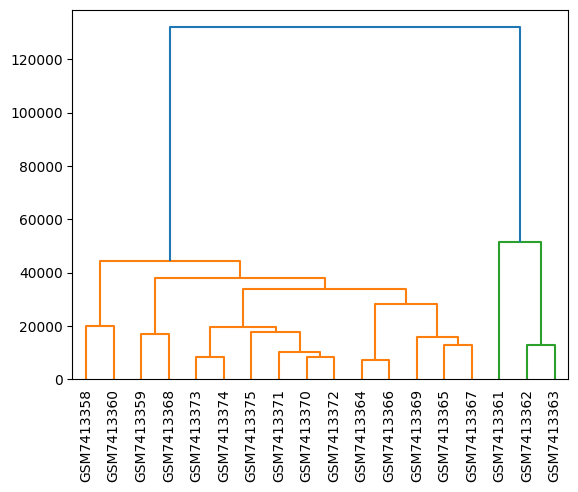

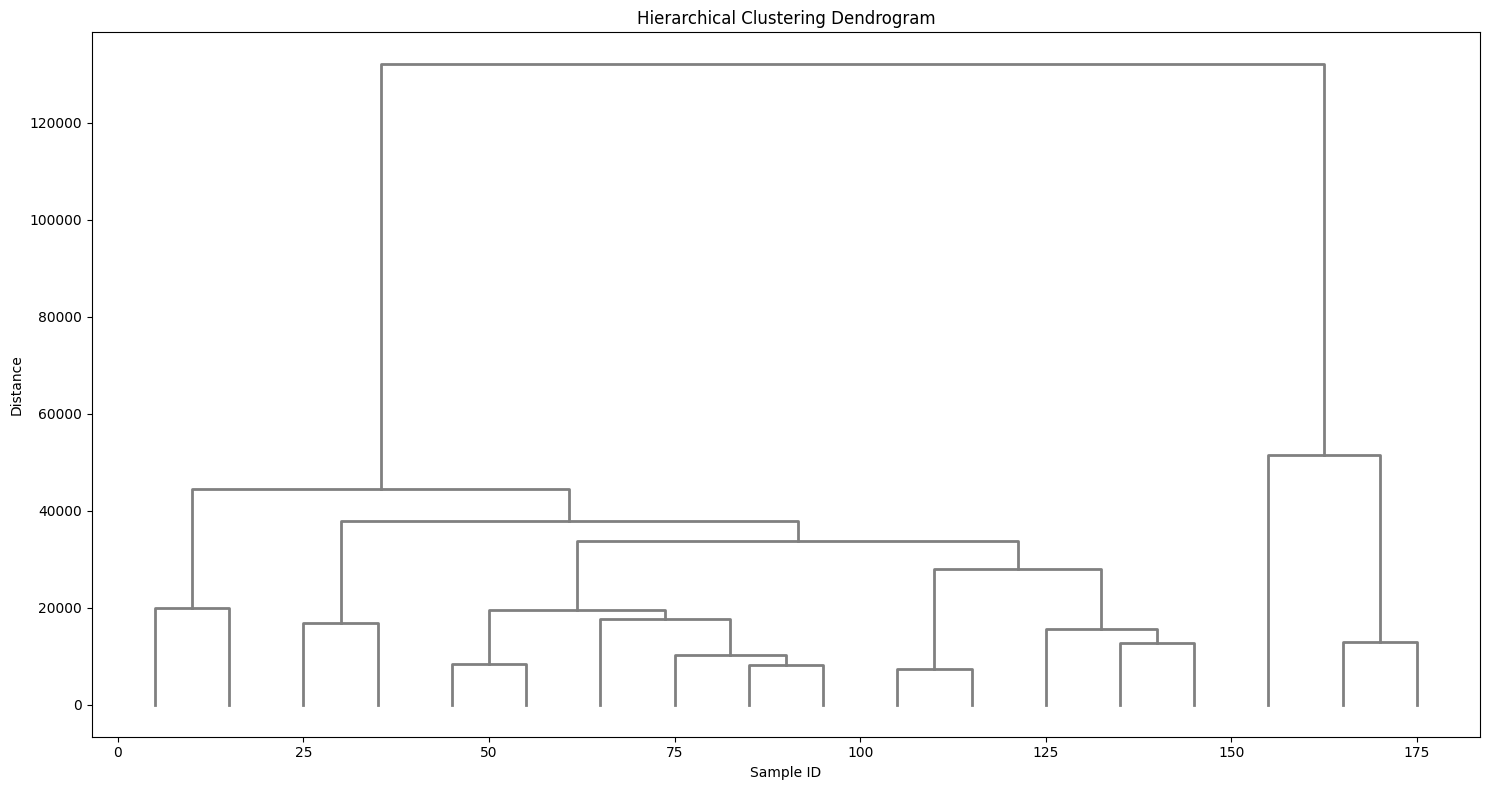

In [24]:
# Example Usage
# Replace with paths to your count matrix and metadata files
count_matrix_file = 'Count_Data_final_GSE233233_QZ_006.csv'
metadata_file = 'Meta_Data_final_GSE233233_QZ_006.csv'

# Load and visualize data
df = load_data(count_matrix_file, metadata_file)

import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from matplotlib.colors import ListedColormap
import seaborn as sns

def hierarchical_clustering(df):
    X = df.drop(columns=['SampleID', 'condition'])  # Exclude metadata columns
    y = df['condition']  # Target variable (condition)

    # Perform hierarchical clustering using Ward's method
    linkage_matrix = linkage(X, method='ward')

    # Create a color palette for the conditions
    unique_conditions = y.unique()
    condition_palette = sns.color_palette("husl", len(unique_conditions))
    condition_colors = {condition: color for condition, color in zip(unique_conditions, condition_palette)}

    # Map condition to color
    sample_colors = y.map(condition_colors).to_dict()

    # Function to color dendrogram lines based on sample conditions
    def color_dendrogram(linkage_matrix, condition_colors):
        color_threshold = 0.7 * max(linkage_matrix[:, 2])
        dendro = dendrogram(
            linkage_matrix,
            labels=df['SampleID'].values,
            leaf_rotation=90,
            leaf_font_size=10,
            color_threshold=color_threshold
        )

        # Map the cluster colors to the conditions
        icoord = dendro['icoord']
        dcoord = dendro['dcoord']
        leaves = dendro['leaves']
        colors = []
        for i, leaf in enumerate(leaves):
            sample_id = df['SampleID'].iloc[leaf]
            colors.append(sample_colors.get(sample_id, 'gray'))

        # Plot colored dendrogram
        plt.figure(figsize=(15, 8))
        for i, (xs, ys) in enumerate(zip(icoord, dcoord)):
            plt.plot(xs, ys, color=colors[i % len(colors)], lw=2)

        plt.title('Hierarchical Clustering Dendrogram')
        plt.xlabel('Sample ID')
        plt.ylabel('Distance')
        plt.tight_layout()
        plt.show()

    color_dendrogram(linkage_matrix, condition_colors)

# Example Usage
hierarchical_clustering(df)


In [25]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Example hierarchical clustering with color-coded dendrogram
def hierarchical_clustering_dendrogram(X, labels, conditions):
    """
    Generate a dendrogram with hierarchical clustering,
    and color samples based on their conditions.

    Args:
        X (pd.DataFrame): Gene expression data (numeric values only).
        labels (list): Sample IDs.
        conditions (list): Conditions corresponding to each sample.
    """
    # Compute distance matrix
    distance_matrix = pdist(X, metric='correlation')

    # Perform hierarchical clustering
    linked = linkage(distance_matrix, method='complete')

    # Map conditions to colors
    unique_conditions = list(set(conditions))
    color_map = {condition: plt.cm.tab10(i) for i, condition in enumerate(unique_conditions)}
    sample_colors = [color_map[condition] for condition in conditions]

    # Plot dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(
        linked,
        labels=labels,
        leaf_rotation=90,
        leaf_font_size=10,
        orientation='top',
        distance_sort='descending',
        show_leaf_counts=True,
        leaf_label_func=lambda idx: f"{labels[idx]} ({conditions[idx]})",
    )

    # Add legend
    handles = [plt.Line2D([0], [0], color=color_map[condition], lw=4) for condition in unique_conditions]
    plt.legend(handles, unique_conditions, title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Finalize plot
    plt.title('Phylogenetic Tree (Dendrogram) of Gene Expression Data')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.tight_layout()
    plt.show()

# Example usage
# Replace these with your actual file paths
count_matrix_file = 'Count_Data_final_GSE233233_QZ_006.csv'
metadata_file = 'Meta_Data_final_GSE233233_QZ_006.csv'

# Load data
df = pd.read_csv(count_matrix_file, index_col=0)
metadata = pd.read_csv(metadata_file)

# Ensure SampleID and Conditions are aligned
df = df.join(metadata.set_index('SampleID'))

# Extract relevant data
X = df.iloc[:, :-1]  # Gene expression data
labels = df.index.tolist()
conditions = df['condition'].tolist()  # Replace 'Condition' with your column name

# Generate the dendrogram
hierarchical_clustering_dendrogram(X, labels, conditions)


ValueError: The condensed distance matrix must contain only finite values.

In [8]:
# Example usage
# Replace these with your actual file paths
count_matrix_file = 'Count_Data_final_GSE233233_QZ_006.csv'
metadata_file = 'Meta_Data_final_GSE233233_QZ_006.csv'

# Load the data
df = pd.read_csv(count_matrix_file, index_col=0)
metadata = pd.read_csv(metadata_file)
df = df.join(metadata.set_index('SampleID'))  # Join metadata

# Plot the dendrogram with color coding by condition
plot_color_coded_dendrogram(df, metadata_column='condition')  # Replace 'Condition' with your column name


ValueError: The condensed distance matrix must contain only finite values.

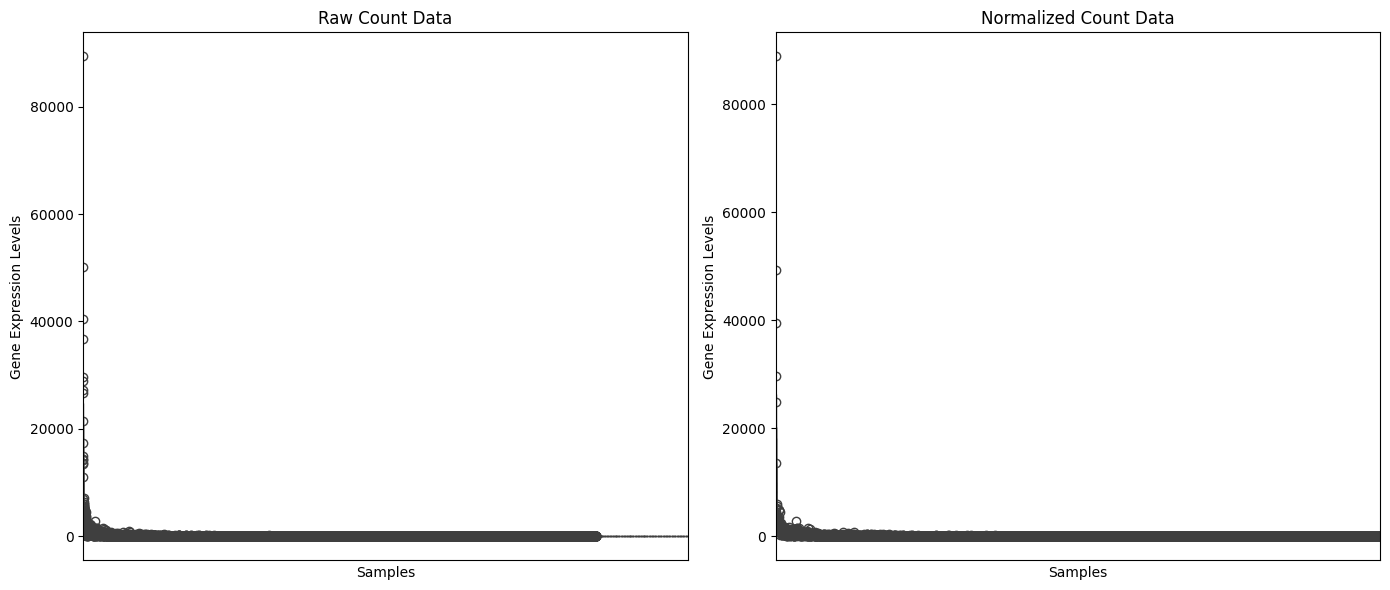

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
count_matrix_file = 'Count_Data_final_GSE233233_QZ_006.csv'
normalized_count_file = 'Normalized_Data_final_GSE233233_QZ_006.csv'

# Read count matrix and normalized data
raw_counts = pd.read_csv(count_matrix_file, index_col=0)
normalized_counts = pd.read_csv(normalized_count_file, index_col=0)

# Transpose data for boxplot (genes as columns)
raw_counts_t = raw_counts.T
normalized_counts_t = normalized_counts.T

# Plot boxplots
plt.figure(figsize=(14, 6))

# Raw counts boxplot
plt.subplot(1, 2, 1)
sns.boxplot(data=raw_counts_t, color="lightblue")
plt.title('Raw Count Data')
plt.xlabel('Samples')
plt.ylabel('Gene Expression Levels')
plt.xticks([], [])  # Hide x-axis labels for cleaner visualization

# Normalized counts boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data=normalized_counts_t, color="lightgreen")
plt.title('Normalized Count Data')
plt.xlabel('Samples')
plt.ylabel('Gene Expression Levels')
plt.xticks([], [])  # Hide x-axis labels for cleaner visualization

# Show the plots
plt.tight_layout()
plt.show()


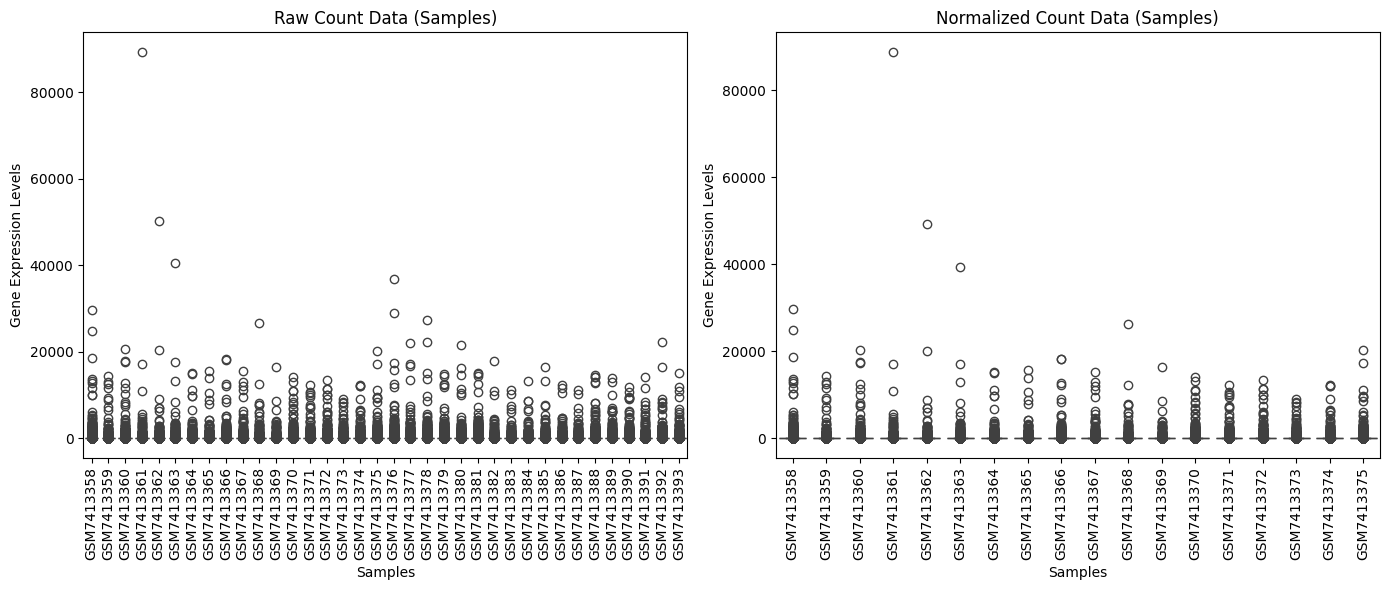

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
count_matrix_file = 'Count_Data_final_GSE233233_QZ_006.csv'
normalized_count_file = 'Normalized_Data_final_GSE233233_QZ_006.csv'

# Read count matrix and normalized data
raw_counts = pd.read_csv(count_matrix_file, index_col=0)
normalized_counts = pd.read_csv(normalized_count_file, index_col=0)

# Plot boxplots
plt.figure(figsize=(14, 6))

# Raw counts boxplot (Samples)
plt.subplot(1, 2, 1)
sns.boxplot(data=raw_counts, color="lightblue")
plt.title('Raw Count Data (Samples)')
plt.xlabel('Samples')
plt.ylabel('Gene Expression Levels')
plt.xticks(rotation=90)  # Rotate sample labels for better visibility

# Normalized counts boxplot (Samples)
plt.subplot(1, 2, 2)
sns.boxplot(data=normalized_counts, color="lightgreen")
plt.title('Normalized Count Data (Samples)')
plt.xlabel('Samples')
plt.ylabel('Gene Expression Levels')
plt.xticks(rotation=90)  # Rotate sample labels for better visibility

# Show the plots
plt.tight_layout()
plt.show()


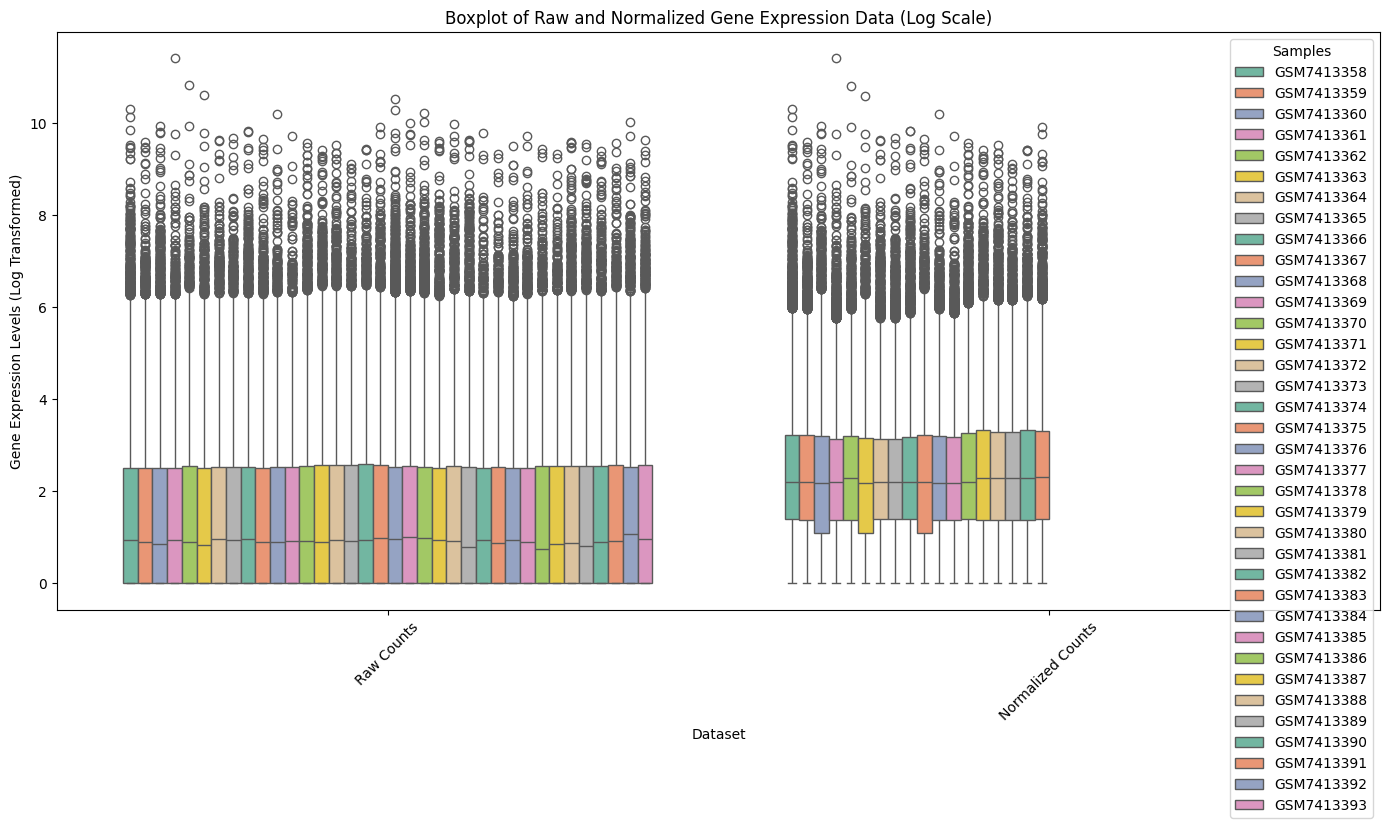

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load your data
count_matrix_file = 'Count_Data_final_GSE233233_QZ_006.csv'
normalized_count_file = 'Normalized_Data_final_GSE233233_QZ_006.csv'

# Read count matrix and normalized data
raw_counts = pd.read_csv(count_matrix_file, index_col=0)
normalized_counts = pd.read_csv(normalized_count_file, index_col=0)

# Reshape data to tidy format
raw_counts_tidy = raw_counts.melt(var_name="Samples", value_name="Gene Expression Levels")
raw_counts_tidy["Dataset"] = "Raw Counts"

normalized_counts_tidy = normalized_counts.melt(var_name="Samples", value_name="Gene Expression Levels")
normalized_counts_tidy["Dataset"] = "Normalized Counts"

# Combine both datasets
combined_data = pd.concat([raw_counts_tidy, normalized_counts_tidy])

# Apply log transformation for better visualization (optional)
combined_data["Gene Expression Levels (Log)"] = np.log1p(combined_data["Gene Expression Levels"])

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(
    x="Dataset",
    y="Gene Expression Levels (Log)",  # Use log-transformed values
    hue="Samples",
    data=combined_data,
    palette="Set2"
)

# Customize the plot
plt.title("Boxplot of Raw and Normalized Gene Expression Data (Log Scale)")
plt.xlabel("Dataset")
plt.ylabel("Gene Expression Levels (Log Transformed)")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
# --- Hierarchical Clustering (Dendrogram) ---
    distance_matrix = pdist(X, metric='correlation')
    linked = linkage(distance_matrix, method='complete')

    # Create a dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(linked, labels=df['SampleID'].values, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Phylogenetic Tree (Dendrogram) of Gene Expression Data')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()


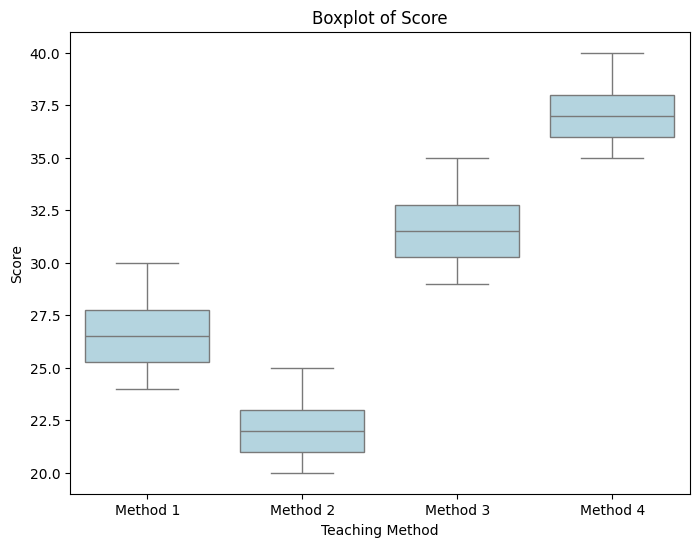

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate data in the required format
data = {
    "Teaching Method": ["Method 1"] * 10 + ["Method 2"] * 10 + ["Method 3"] * 10 + ["Method 4"] * 10,
    "Score": [25, 27, 26, 28, 30, 29, 26, 25, 24, 27,  # Method 1
              20, 21, 22, 23, 25, 23, 24, 21, 22, 20,  # Method 2
              30, 32, 34, 33, 31, 29, 30, 32, 31, 35,  # Method 3
              35, 36, 37, 38, 39, 37, 35, 36, 38, 40]  # Method 4
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="Teaching Method", y="Score", data=df, color="lightblue")

# Customize the plot
plt.title("Boxplot of Score")
plt.xlabel("Teaching Method")
plt.ylabel("Score")

# Show the plot
plt.show()


# **Load Data**

In [ ]:
merged_df = pd.read_csv("merged_df_data.csv", index_col=0)
condition = merged_df.iloc[:, -1]  # Separate the 'condition' column

In [ ]:
df_batch = pd.read_csv("MPXV_df_Batch_X_Con.csv", index_col=0)

In [ ]:
MPXV_batch = df_batch.T

In [ ]:
MPXV_batch ['condition'] = condition


In [ ]:
MPXV_df = MPXV_batch

In [ ]:
display(MPXV_df)

,CCND1,CARS1,CTSD,DIO2,DMPK,GATA6,GDF9,HSD17B10,HSD17B4,MSI1,...,ZNF266,MGRN1,SIN3B,SLC9A8,NEDD4L,SZT2,LPAR3,ZNF451,UBXN7,condition
GSM283161,5.058427,-5.315635,-1.555961,-2.143200,-10.666968,-3.524910,-14.157070,25.835955,13.729143,-1.639096,...,27.263074,-2.069973,-3.095794,-2.588255,16.979523,1.054640,8.485717,-1.932022,15.170423,0
GSM283162,18.116820,-9.655584,58.606951,-3.008353,-10.129821,-4.593773,-15.515444,31.272768,15.150031,-2.035445,...,6.159372,-0.309324,-2.584952,-3.217553,10.151260,1.915485,8.593816,-1.399412,8.850057,0
GSM283163,14.945544,-4.325790,67.019087,-2.416997,-4.370858,-3.007237,-13.905687,24.729470,11.535111,-1.865961,...,15.329382,0.764032,-0.799863,-2.490128,17.448207,-2.074844,8.947838,-1.978337,0.409300,0
GSM283164,8.155317,-9.624894,55.682859,-4.543469,-4.571899,-4.765819,-10.268680,29.800549,12.078117,-2.175938,...,20.003625,0.769274,2.691213,-2.351574,10.856503,-1.209160,9.248668,-2.827881,8.643871,0
GSM283165,-2.590431,-6.983679,32.349507,4.034263,-1.305101,9.155958,-11.301895,33.258067,-0.782288,2.028153,...,4.084995,2.008985,4.205840,8.178131,-13.930936,-4.169821,-3.541350,6.871347,9.313010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM6765213,6.701648,-11.508198,99.300909,1.110815,-4.763930,12.999276,-8.812400,11.452977,10.235491,-0.534848,...,-6.843125,4.715384,-3.326807,-0.408063,-0.639228,-12.188126,-3.583763,-2.734207,-11.720940,0
GSM6765214,9.227744,-11.653790,121.718480,0.789937,-3.534497,15.241316,-8.819613,7.693610,10.440299,-0.470481,...,-6.444974,4.644855,-2.138985,-0.728171,-1.566832,-11.974936,-3.779679,-2.633909,-11.476771,0
GSM6765215,4.401319,-11.256094,56.994695,1.497461,-4.218720,8.712041,-8.947791,5.183576,7.771187,0.034541,...,-4.741894,2.243831,-2.993999,-1.492334,-4.663022,-12.003891,-3.318733,-2.838658,-10.749973,0
GSM6765225,6.490574,-11.819464,64.601541,1.719970,-4.299668,11.404756,-9.037308,7.680737,8.623204,0.616420,...,-5.699615,3.525853,-3.248663,-1.575946,-3.512443,-12.143772,-3.272086,-2.711959,-10.511599,0


# **PCA, t-SNE, UMAP, and hierarchical clustering visualization**

Scale (Z-Score Normalization) data Before Dimention Reduction

In [ ]:
import pandas as pd

def z_score_normalize(df):
    # Ensure the DataFrame contains only numeric data
    numeric_df = df.select_dtypes(include='number')

    # Calculate Z-score normalization
    normalized_df = (numeric_df - numeric_df.mean()) / numeric_df.std()

    return normalized_df

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

# Set random seed for reproducibility
random_seed = 123

# Function for visualization using dimensionality reduction (PCA, t-SNE, UMAP) and clustering
def visualize_dim_reduction_and_clustering(df):
    X = df.drop(columns=['condition'])  # Exclude the target variable
    y = df['condition']  # Target variable (condition)

    # --- PCA ---
    pca = PCA(n_components=2, random_state=random_seed)
    pca_result = pca.fit_transform(X)
    pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
    pca_df['condition'] = y.values

    # Plot PCA
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='PCA1', y='PCA2', hue='condition', data=pca_df, palette='viridis')
    plt.title('PCA of MPXV Data')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.legend(title='Condition')
    plt.show()

    # --- t-SNE ---
    def set_perplexity(n_samples):
        """Set appropriate perplexity based on the number of samples."""
        return min(30, max(5, n_samples // 3))

    # Get appropriate perplexity
    n_samples = X.shape[0]
    perplexity_value = set_perplexity(n_samples)

    tsne = TSNE(n_components=2, perplexity=perplexity_value, n_iter=300, random_state=random_seed)
    tsne_result = tsne.fit_transform(X)
    tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
    tsne_df['condition'] = y.values

    # Plot t-SNE
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='TSNE1', y='TSNE2', hue='condition', data=tsne_df, palette='viridis')
    plt.title('t-SNE of MPXV Data')
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.grid()
    plt.legend(title='Condition')
    plt.show()

    # --- UMAP ---
    import warnings

    # Suppress UMAP random_state-related warnings
    warnings.filterwarnings("ignore", category=UserWarning, message="n_jobs value.*")

    umap_model = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=random_seed)

    #umap_model = umap.UMAP(n_components=2, random_state=random_seed)
    umap_result = umap_model.fit_transform(X)
    umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
    umap_df['condition'] = y.values

    # Plot UMAP
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='UMAP1', y='UMAP2', hue='condition', data=umap_df, palette='viridis')
    plt.title('UMAP of MPXV Data')
    plt.xlabel('UMAP Component 1')
    plt.ylabel('UMAP Component 2')
    plt.grid()
    plt.legend(title='Condition')
    plt.show()

    # --- Hierarchical Clustering (Dendrogram) ---
    # Calculate the distance matrix using correlation (1 - correlation for distance)
    distance_matrix = pdist(X, metric='correlation')

    # Perform hierarchical clustering
    linked = linkage(distance_matrix, method='complete')

    # Create a dendrogram
    plt.figure(figsize=(12, 6))
    dendrogram(linked, labels=df.index, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Phylogenetic Tree (Dendrogram) of MPXV Expression Data')
    plt.xlabel('Samples')
    plt.ylabel('Distance')
    plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_correlation_clustermap(df, drop_column):
    # Drop the specified column
    df_cor = df.drop(columns=[drop_column])

    # Compute the Pearson correlation matrix
    correlation_matrix = df_cor.corr(method='pearson')

    # Create a clustermap
    sns.clustermap(
        correlation_matrix,
        annot=False,
        cmap='coolwarm',
        vmin=-1,  # Set the minimum value for the color scale
        vmax=1,   # Set the maximum value for the color scale
        cbar_kws={"shrink": .8},
        method='average'
    )

    # Set title (use plt.gcf() to get the current figure)
    plt.suptitle('Pearson Correlation Clustermap', fontsize=16)

    plt.savefig('Pearson_Correlation_Clustermap.pdf')  # Save the plot as a PDF file

    # Show the plot
    plt.show()


In [ ]:
MPXV_df_d = MPXV_df.drop(columns=['condition'])
MPXV_df_norm = z_score_normalize(MPXV_df_d)
MPXV_df_norm ['condition'] = condition

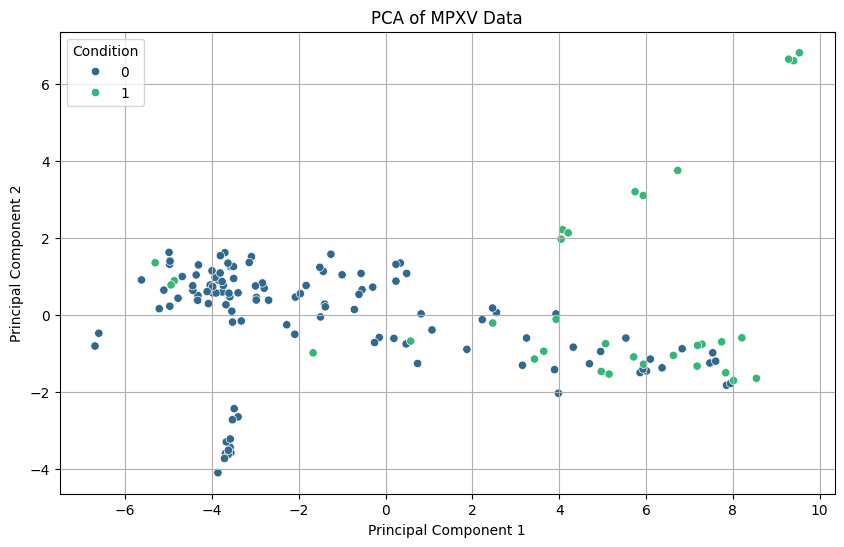

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x784e16ffb400>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-0cf96a72.3.23.dev.so: cannot open shared object file: No such file or directory


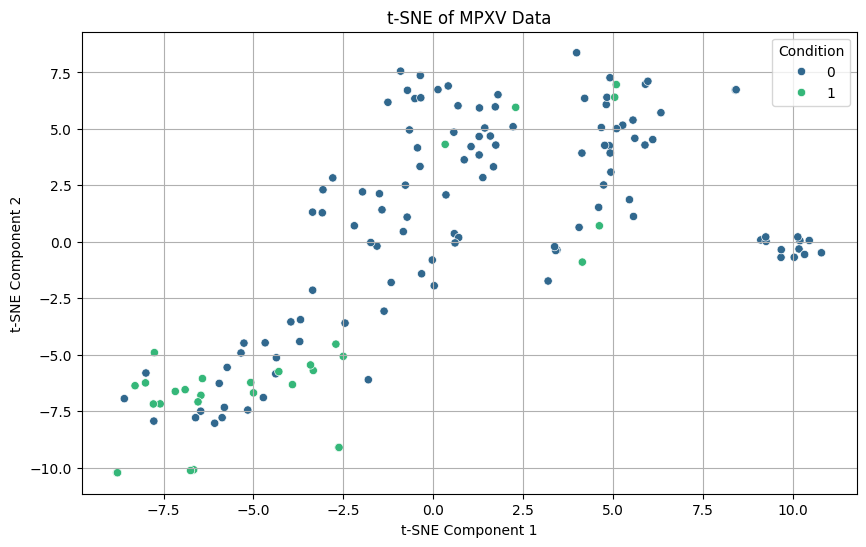

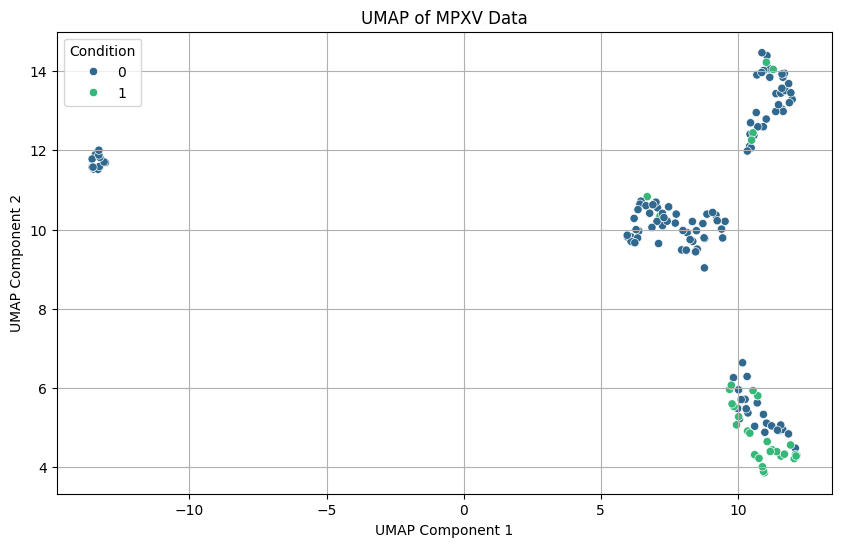

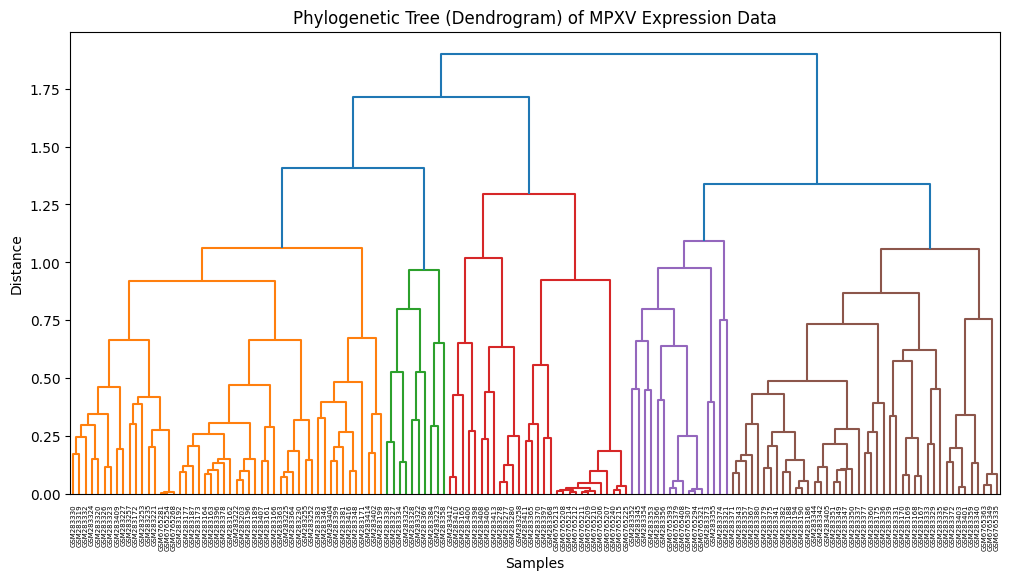

In [ ]:
# Usage:
visualize_dim_reduction_and_clustering(MPXV_df_norm)

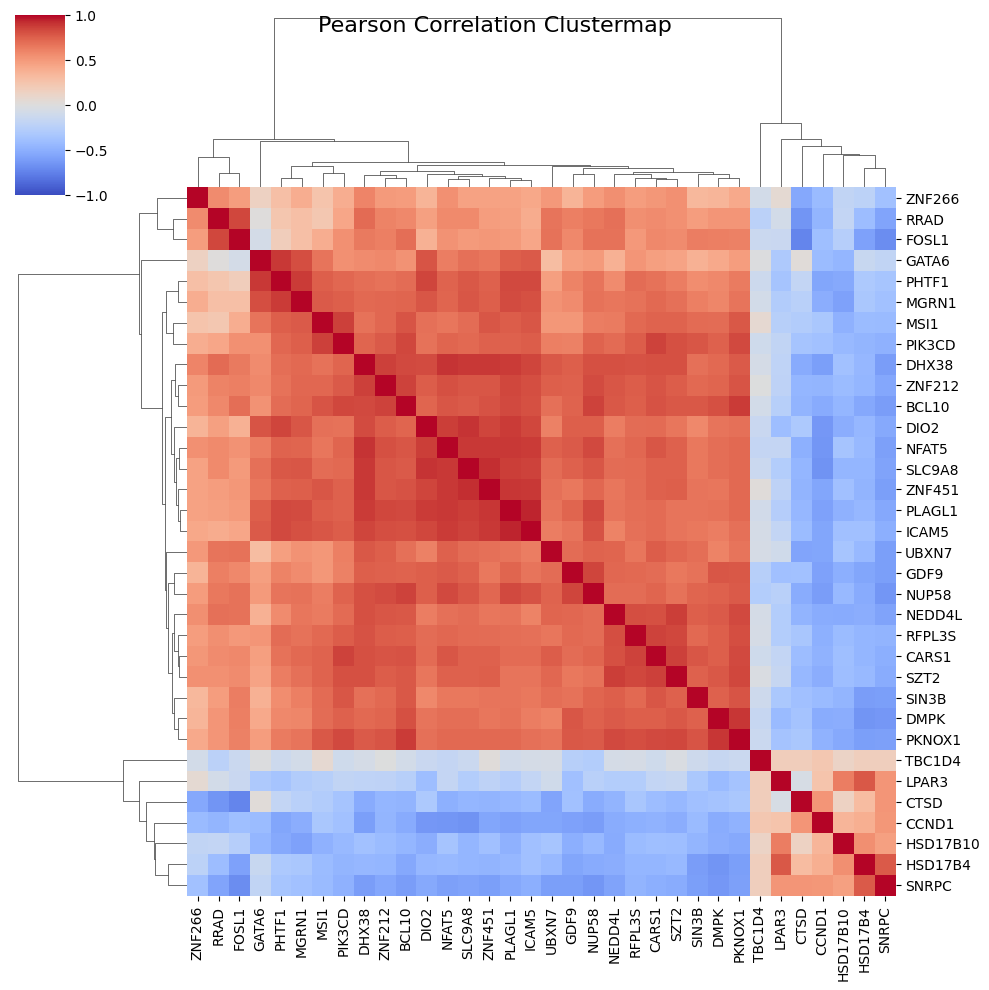

In [ ]:
# Example usage:
plot_correlation_clustermap(MPXV_df_norm, 'condition')


# **Setup**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# import pycaret classification and init setup
from pycaret.classification import *
setup(MPXV_df, target = 'condition', train_size = 0.8, session_id = 123, normalize = True, normalize_method = 'zscore',
      feature_selection=True, feature_selection_method='classic',
      n_features_to_select = .5)

[LightGBM] [Info] Number of positive: 26, number of negative: 92
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1393
[LightGBM] [Info] Number of data points in the train set: 118, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220339 -> initscore=-1.263692
[LightGBM] [Info] Start training from score -1.263692
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

,Description,Value
0,Session id,123
1,Target,condition
2,Target type,Binary
3,Original data shape,"(148, 35)"
4,Transformed data shape,"(148, 18)"
5,Transformed train set shape,"(118, 18)"
6,Transformed test set shape,"(30, 18)"
7,Numeric features,34
8,Preprocess,True
9,Imputation type,simple


# **Compare Models**

In [ ]:
# compare baseline models
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9492,0.9185,0.8500,0.9333,0.8733,0.8426,0.8550,0.7390
et,Extra Trees Classifier,0.9492,0.9333,0.7833,1.0000,0.8667,0.8371,0.8544,0.1630
knn,K Neighbors Classifier,0.9409,0.9213,0.7500,1.0000,0.8267,0.7978,0.8264,0.0530
rf,Random Forest Classifier,0.9318,0.9139,0.7333,0.8667,0.7867,0.7556,0.7654,0.1910
lightgbm,Light Gradient Boosting Machine,0.9303,0.9222,0.7667,0.9333,0.8267,0.7853,0.8010,0.0800
ridge,Ridge Classifier,0.9144,0.9006,0.7500,0.7833,0.7348,0.6955,0.7156,0.0530
lda,Linear Discriminant Analysis,0.9144,0.8969,0.7500,0.7833,0.7348,0.6955,0.7156,0.0830
ada,Ada Boost Classifier,0.9061,0.8815,0.7333,0.8500,0.7633,0.7065,0.7263,0.1740
xgboost,Extreme Gradient Boosting,0.9053,0.9333,0.6833,0.8333,0.7400,0.6844,0.6957,0.0900
dt,Decision Tree Classifier,0.8879,0.8456,0.7667,0.7833,0.7538,0.6843,0.6994,0.0510


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
selected_features = best.feature_names_in_
print(selected_features)

['CCND1' 'CARS1' 'DIO2' 'GATA6' 'MSI1' 'PKNOX1' 'PLAGL1' 'RRAD' 'SNRPC'
 'ICAM5' 'ZNF212' 'NUP58' 'ZNF266' 'SZT2' 'LPAR3' 'ZNF451' 'UBXN7']


# **Build Models**

In [ ]:
# Example usage
model_id = 'et'

# Create the model
selected_model = create_model(model_id)

# Tune the model and get both the tuned model and the tuner object
tuned_model, tuner = tune_model(selected_model, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9167,0.7037,0.6667,1.0000,0.8000,0.7500,0.7746
3,0.9167,1.0000,0.6667,1.0000,0.8000,0.7500,0.7746
4,0.9167,0.9630,0.6667,1.0000,0.8000,0.7500,0.7746
5,0.9167,1.0000,0.6667,1.0000,0.8000,0.7500,0.7746
6,0.9167,0.8889,0.6667,1.0000,0.8000,0.7500,0.7746
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8333,0.7778,0.6667,0.6667,0.6667,0.5556,0.5556
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9167,0.9630,0.6667,1.0000,0.8000,0.7500,0.7746
5,0.9167,1.0000,0.6667,1.0000,0.8000,0.7500,0.7746
6,0.8333,0.9259,0.6667,0.6667,0.6667,0.5556,0.5556
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# based on result user will say, which model ( tuned or main model) he wants to analyze
model = selected_model # default

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Assuming MPXV_df is your DataFrame and selected_features is defined
X = MPXV_df[selected_features]  # Data for the top features
y = MPXV_df['condition']  # Target variable

# Initialize cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Hyperparameter grids for tuning
param_grids = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Extra Trees': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'K Neighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'AdaBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [-1, 10, 20]
    },
    # Add tuning params for other models as needed
}

# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=123),
    'Extra Trees': ExtraTreesClassifier(random_state=123),  # Original model
    'K Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=123),  # Original model
    'LightGBM': LGBMClassifier(random_state=123, verbosity=-1),
    'LDA': LinearDiscriminantAnalysis(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Decision Tree': DecisionTreeClassifier(random_state=123),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True, random_state=123),
    'QDA': QuadraticDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'Dummy': DummyClassifier(strategy='most_frequent')
}

# Store the best models and their AUC scores
best_models = {}
best_auc_scores = {}

# Loop through classifiers for hyperparameter tuning
for name, model in classifiers.items():
    # Check if the classifier is Extra Trees or Random Forest
    if name in ['Extra Trees', 'Random Forest']:
        # Use the original model without hyperparameter tuning
        y_pred_proba_cv = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
        best_model = model
        best_auc = roc_auc_score(y, y_pred_proba_cv)
    else:
        # If a parameter grid exists for the classifier, perform GridSearchCV
        if name in param_grids:
            grid_search = GridSearchCV(model, param_grids[name], cv=cv, scoring='roc_auc', n_jobs=-1)
            grid_search.fit(X, y)
            best_model = grid_search.best_estimator_
            best_auc = grid_search.best_score_
        else:
            # If no tuning, just use the default model
            y_pred_proba_cv = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
            best_model = model
            best_auc = roc_auc_score(y, y_pred_proba_cv)

    # Store the best model and its AUC score
    best_models[name] = best_model
    best_auc_scores[name] = best_auc

# Now you can inspect the best models and their AUC scores
print(best_auc_scores)


{'Logistic Regression': 0.9399585921325052, 'Extra Trees': 0.9653491436100132, 'K Neighbors': 0.9178053830227745, 'Random Forest': 0.9595520421607379, 'LightGBM': 0.9548654244306418, 'LDA': 0.9227931488801054, 'AdaBoost': 0.9418219461697722, 'XGBoost': 0.9521739130434781, 'Decision Tree': 0.8548089591567852, 'Gradient Boosting': 0.9534161490683231, 'SVM': 0.9088274044795783, 'QDA': 0.8268774703557312, 'Naive Bayes': 0.840052700922266, 'Dummy': 0.5}


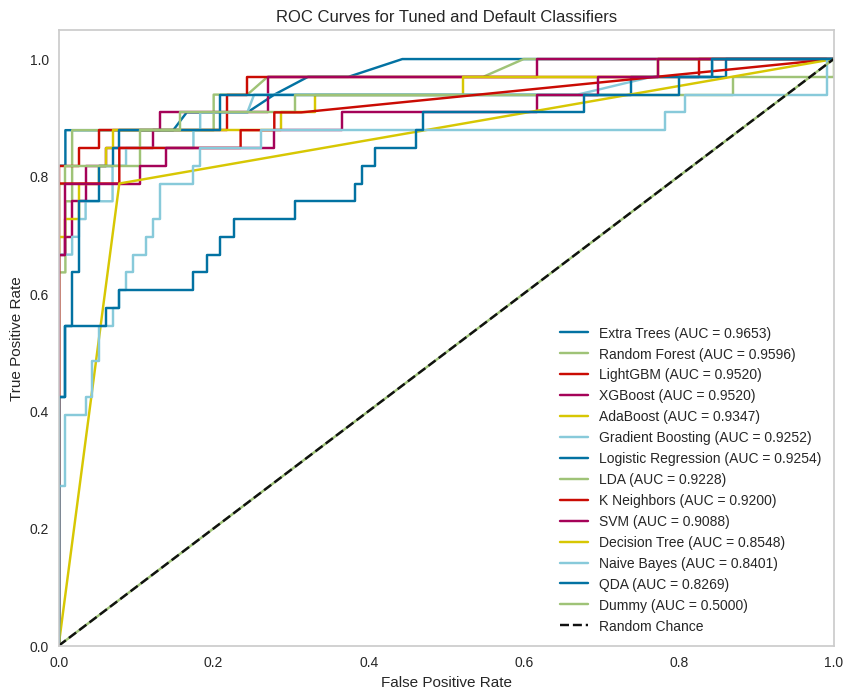

In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Plotting ROC curves
plt.figure(figsize=(10, 8))

# Store AUC values with model names for sorting
auc_values = [(name, roc_auc_score(y, cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1])) for name, model in best_models.items()]

# Sort models based on AUC values in descending order
auc_values.sort(key=lambda x: x[1], reverse=True)

# Loop through sorted AUC values to compute and plot ROC curves
for name, _ in auc_values:
    y_pred_proba_cv = cross_val_predict(best_models[name], X, y, cv=cv, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y, y_pred_proba_cv)
    roc_auc = roc_auc_score(y, y_pred_proba_cv)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.4f})')

# Plot diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Finalize the plot
plt.title('ROC Curves for Tuned and Default Classifiers')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid()
plt.show()


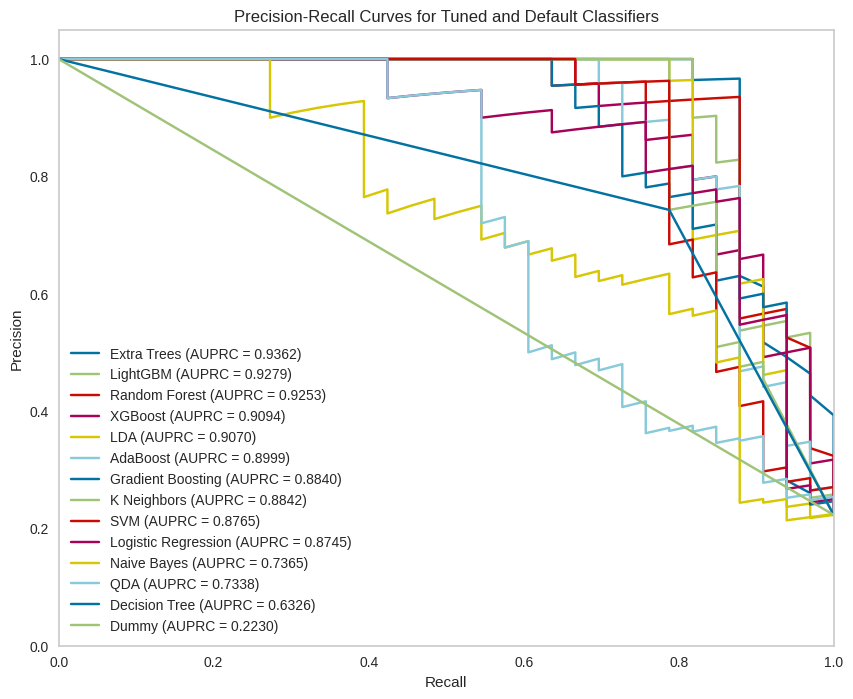

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Plotting AUPRC curves
plt.figure(figsize=(10, 8))

# Store AUPRC values with model names for sorting
auprc_values = []

# Loop through best models to compute AUPRC values
for name, model in best_models.items():
    y_pred_proba_cv = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pred_proba_cv)
    auprc = average_precision_score(y, y_pred_proba_cv)
    auprc_values.append((name, auprc))  # Append model name and AUPRC value

# Sort models based on AUPRC values in descending order
auprc_values.sort(key=lambda x: x[1], reverse=True)

# Loop through sorted AUPRC values to plot AUPRC curves
for name, _ in auprc_values:
    y_pred_proba_cv = cross_val_predict(best_models[name], X, y, cv=cv, method='predict_proba')[:, 1]
    precision, recall, _ = precision_recall_curve(y, y_pred_proba_cv)
    auprc = average_precision_score(y, y_pred_proba_cv)
    plt.plot(recall, precision, label=f'{name} (AUPRC = {auprc:.4f})')

# Finalize the plot
plt.title('Precision-Recall Curves for Tuned and Default Classifiers')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.grid()
plt.show()


In [ ]:
# Get the feature names after feature selection
selected_features = selected_model.feature_names_in_

# Check if the model has feature importances or coefficients
if hasattr(tuned_model, 'feature_importances_'):
    # For tree-based models
    importance_values = tuned_model.feature_importances_
else:
    # For Logistic Regression (and similar models)
    importance_values = tuned_model.coef_[0]  # Get coefficients for the first (and usually only) class

# Create a DataFrame for the importance values using the selected features
importance_df = pd.DataFrame(importance_values, index=selected_features[:len(importance_values)], columns=['Importance'])

# Sort the DataFrame by importance
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the DataFrame
print(importance_df)

        Importance
ZNF212    0.122431
RRAD      0.095452
NUP58     0.095054
ZNF266    0.085089
PLAGL1    0.080800
ZNF451    0.074623
ICAM5     0.065503
MSI1      0.054409
CARS1     0.045123
SZT2      0.045089
PKNOX1    0.039639
DIO2      0.038786
UBXN7     0.037967
GATA6     0.035887
SNRPC     0.030935
LPAR3     0.030629
CCND1     0.022584


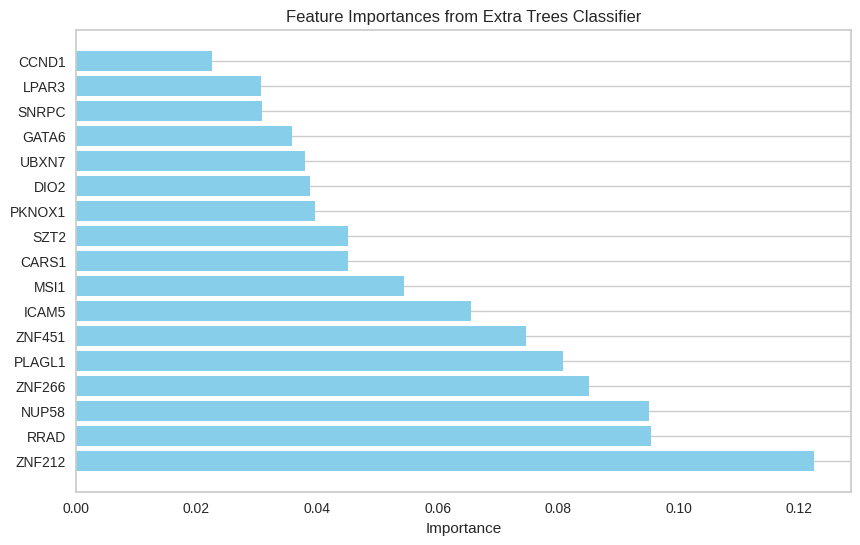

In [ ]:
# Importing necessary libraries for plotting
import matplotlib.pyplot as plt

# Get feature importances
importances = selected_model.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances from Extra Trees Classifier')
plt.grid(axis='x')
plt.show()


In [ ]:
top_10_features = importance_df.head(10).index.tolist()
print(top_10_features)

['ZNF212', 'RRAD', 'NUP58', 'ZNF266', 'PLAGL1', 'ZNF451', 'ICAM5', 'MSI1', 'CARS1', 'SZT2']


In [ ]:
# Filter the features with importance greater than 0.1
# filtered_features_df = importance_df[importance_df['Importance'] > .10]
filtered_features_df = importance_df.head(9)
# Display the filtered DataFrame
print(filtered_features_df)

        Importance
ZNF212    0.122431
RRAD      0.095452
NUP58     0.095054
ZNF266    0.085089
PLAGL1    0.080800
ZNF451    0.074623
ICAM5     0.065503
MSI1      0.054409
CARS1     0.045123


In [ ]:
# Extract the feature names into an array
filtered_features_array = filtered_features_df.index.to_numpy()
print(filtered_features_array)

['ZNF212' 'RRAD' 'NUP58' 'ZNF266' 'PLAGL1' 'ZNF451' 'ICAM5' 'MSI1' 'CARS1']


In [ ]:
# Select the expression data of top features
top_features_df = MPXV_df[filtered_features_array]
top_features_df['condition'] = MPXV_df['condition']
display(top_features_df)

,ZNF212,RRAD,NUP58,ZNF266,PLAGL1,ZNF451,ICAM5,MSI1,CARS1,condition
GSM283161,-0.897219,17.017520,-21.008326,27.263074,-0.387434,-1.932022,-2.328721,-1.639096,-5.315635,0
GSM283162,-2.622514,21.979421,-42.948806,6.159372,-5.035315,-1.399412,-4.363800,-2.035445,-9.655584,0
GSM283163,-5.103621,19.700083,-6.815738,15.329382,-0.634334,-1.978337,-2.440164,-1.865961,-4.325790,0
GSM283164,-7.332981,-22.177064,-21.366071,20.003625,-1.265972,-2.827881,-2.904554,-2.175938,-9.624894,0
GSM283165,-5.470771,47.694168,3.658129,4.084995,4.273160,6.871347,1.962562,2.028153,-6.983679,0
...,...,...,...,...,...,...,...,...,...,...
GSM6765213,-5.358029,-117.395700,-11.833692,-6.843125,1.197621,-2.734207,-1.707289,-0.534848,-11.508198,0
GSM6765214,-5.832639,-115.873958,-11.759890,-6.444974,1.630686,-2.633909,-1.785681,-0.470481,-11.653790,0
GSM6765215,-5.786598,-117.880191,-11.540015,-4.741894,1.876210,-2.838658,-2.280882,0.034541,-11.256094,0
GSM6765225,-5.888734,-117.158865,-11.474478,-5.699615,1.876063,-2.711959,-2.042964,0.616420,-11.819464,0


In [ ]:
MPXV_df_d = top_features_df.drop(columns=['condition'])
MPXV_df_norm = z_score_normalize(MPXV_df_d)
MPXV_df_norm ['condition'] = condition

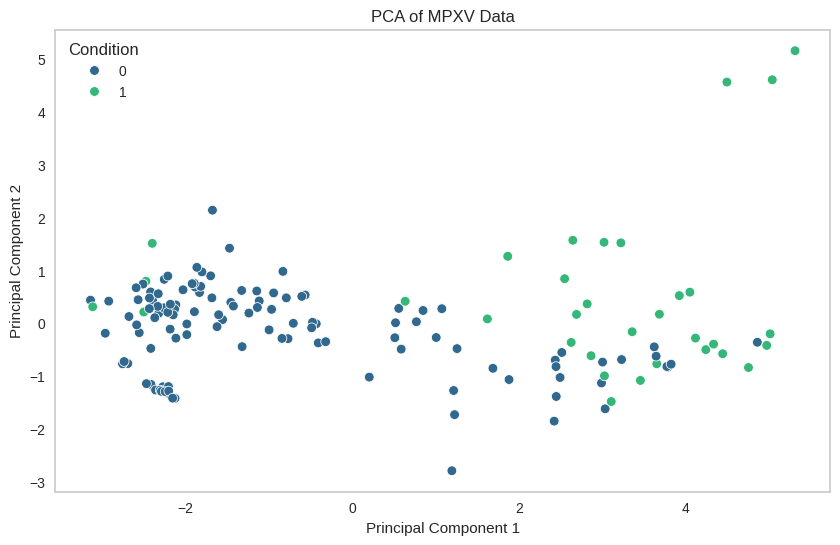

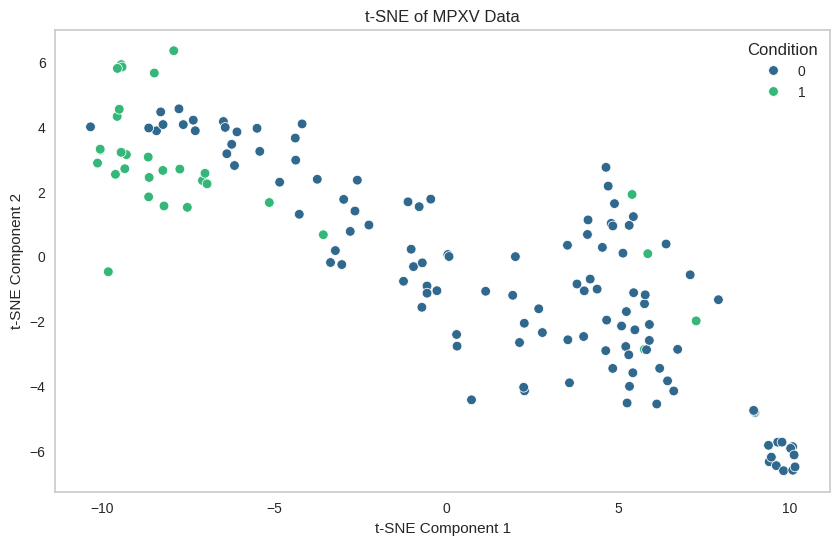

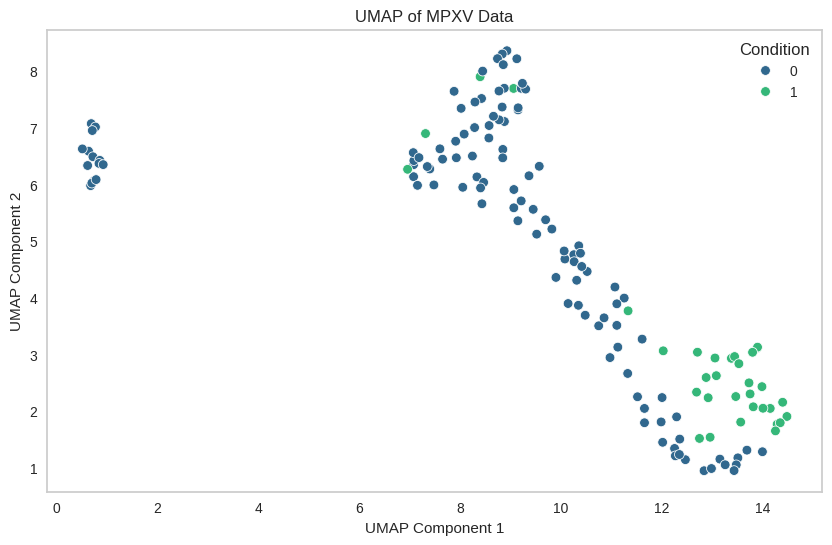

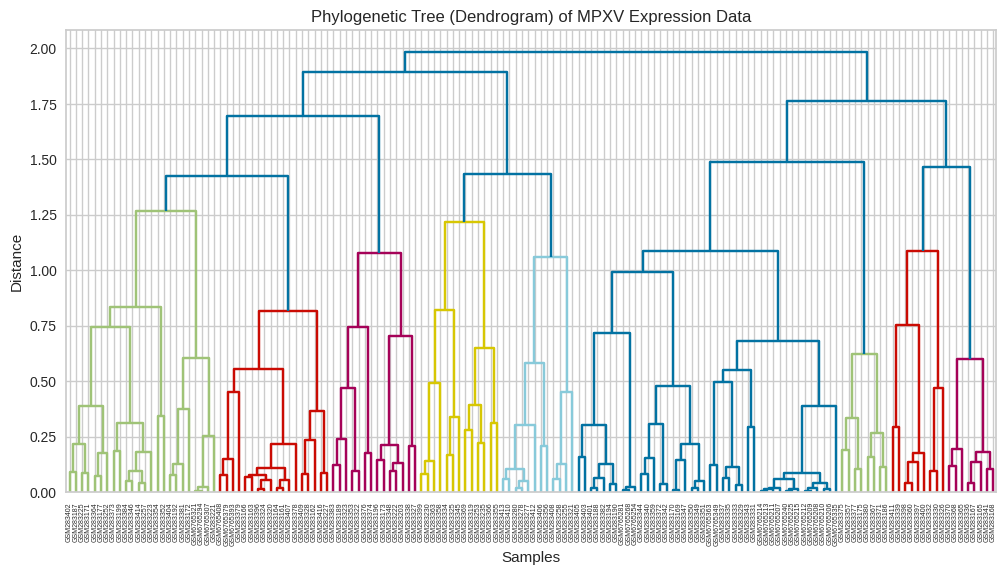

In [ ]:
# Usage:
visualize_dim_reduction_and_clustering(MPXV_df_norm)

# **Biomarkers**

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
setup(top_features_df, target = 'condition', train_size = 0.8, session_id = 123, normalize= True, normalize_method= 'zscore')

,Description,Value
0,Session id,123
1,Target,condition
2,Target type,Binary
3,Original data shape,"(148, 10)"
4,Transformed data shape,"(148, 10)"
5,Transformed train set shape,"(118, 10)"
6,Transformed test set shape,"(30, 10)"
7,Numeric features,9
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# compare baseline models
best = compare_models()
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9568,0.9213,0.8000,1.0000,0.8733,0.8491,0.8665,0.0370
et,Extra Trees Classifier,0.9568,0.9574,0.8000,1.0000,0.8733,0.8491,0.8665,0.1330
qda,Quadratic Discriminant Analysis,0.9485,0.8963,0.7667,1.0000,0.8433,0.8170,0.8413,0.0460
gbc,Gradient Boosting Classifier,0.9394,0.9389,0.8000,0.9167,0.8367,0.8010,0.8158,0.1140
rf,Random Forest Classifier,0.9311,0.9056,0.7167,0.8667,0.7733,0.7426,0.7550,0.2660
xgboost,Extreme Gradient Boosting,0.9227,0.9204,0.7167,0.8333,0.7600,0.7232,0.7331,0.0480
lr,Logistic Regression,0.9220,0.8839,0.7500,0.8417,0.7724,0.7283,0.7437,0.0300
lightgbm,Light Gradient Boosting Machine,0.9220,0.8981,0.7500,0.8417,0.7790,0.7338,0.7443,0.0950
ada,Ada Boost Classifier,0.9053,0.8978,0.7667,0.8167,0.7667,0.7099,0.7283,0.1530
ridge,Ridge Classifier,0.9053,0.8572,0.7500,0.8000,0.7448,0.6904,0.7111,0.0340


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')


In [ ]:
# Example usage
model_id_2 = 'et'

# Create the model
selected_model_2 = create_model(model_id_2)

# Tune the model and get both the tuned model and the tuner object
tuned_model_2, tuner_2 = tune_model(selected_model_2, return_tuner=True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9167,0.8889,0.6667,1.0000,0.8000,0.7500,0.7746
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9167,1.0000,0.6667,1.0000,0.8000,0.7500,0.7746
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9167,0.9630,0.6667,1.0000,0.8000,0.7500,0.7746
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9091,1.0000,0.5000,1.0000,0.6667,0.6207,0.6708


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.8333,0.8148,0.6667,0.6667,0.6667,0.5556,0.5556
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,0.9167,0.9630,0.6667,1.0000,0.8000,0.7500,0.7746
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.8333,0.9630,0.6667,0.6667,0.6667,0.5556,0.5556
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


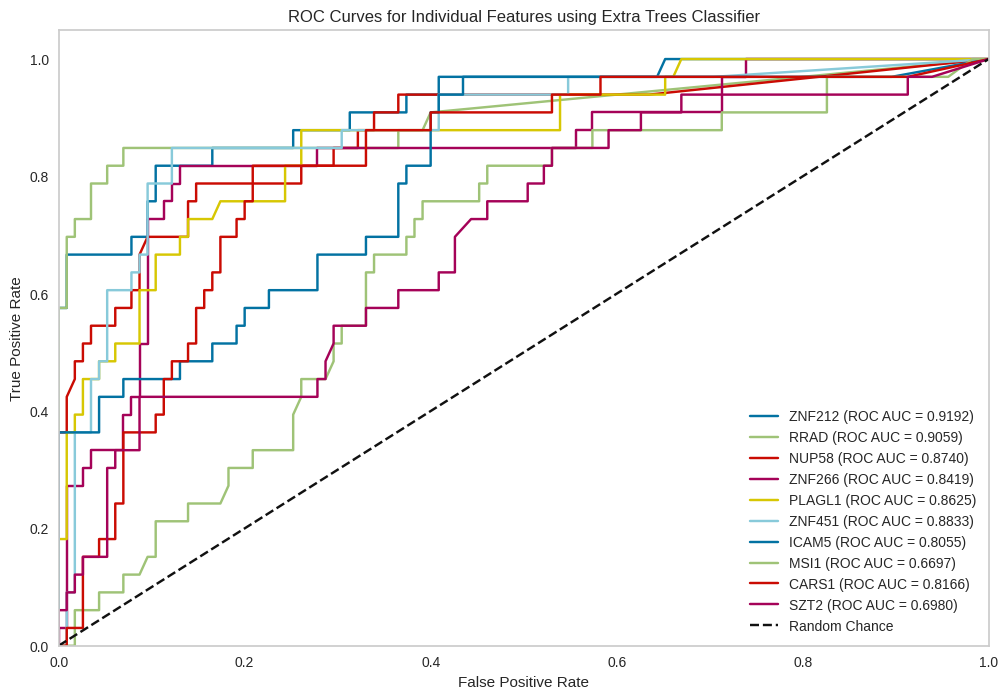

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict, StratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import ExtraTreesClassifier

# Assuming top 10 features
top_10_features = importance_df.head(10).index.tolist()
X = MPXV_df[top_10_features]  # Data for the top 10 features
y = MPXV_df['condition']  # Target variable

# Initialize cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Hyperparameter grid for tuning Extra Trees
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Store results for AUROC and AUC scores
roc_auc_scores = {}
predictions = {}

# Loop through top features for individual modeling and tuning
for feature in top_10_features:
    X_single = X[[feature]]  # Select only the current feature

    # Initialize Extra Trees Classifier
    et_model = ExtraTreesClassifier(random_state=123)

    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(et_model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_single, y)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Cross-validate to get prediction probabilities
    y_pred_proba_cv = cross_val_predict(best_model, X_single, y, cv=cv, method='predict_proba')[:, 1]

    # Calculate ROC AUC score
    roc_auc = roc_auc_score(y, y_pred_proba_cv)
    roc_auc_scores[feature] = roc_auc
    predictions[feature] = y_pred_proba_cv

# Initialize figure for ROC curves
plt.figure(figsize=(12, 8))

# Plot ROC curves for all features
for feature in top_10_features:
    fpr, tpr, _ = roc_curve(y, predictions[feature])
    plt.plot(fpr, tpr, label=f'{feature} (ROC AUC = {roc_auc_scores[feature]:.4f})')

# Plot diagonal line for random chance
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Finalize the ROC plot
plt.title('ROC Curves for Individual Features using Extra Trees Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right')
plt.grid()
plt.show()


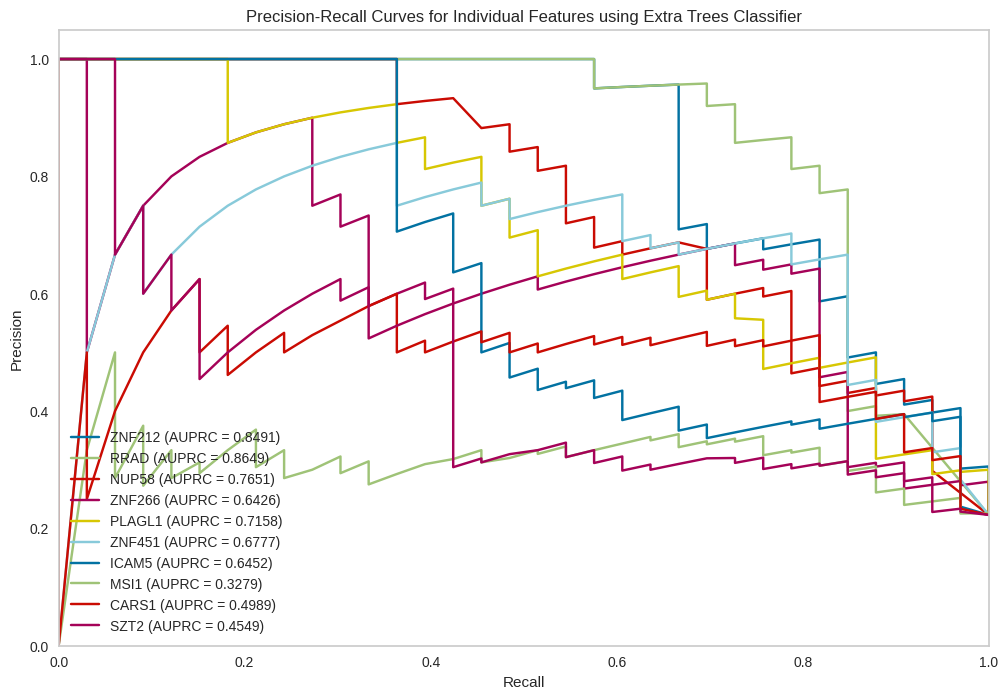

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Initialize figure for AUPRC curves
plt.figure(figsize=(12, 8))

# Store AUPRC values with feature names for plotting
auprc_scores = {}

# Loop through top features to compute AUPRC values
for feature in top_10_features:
    y_pred_proba_cv = predictions[feature]

    # Calculate precision and recall
    precision, recall, _ = precision_recall_curve(y, y_pred_proba_cv)

    # Calculate AUPRC
    auprc = average_precision_score(y, y_pred_proba_cv)
    auprc_scores[feature] = auprc

    # Plot the Precision-Recall curve
    plt.plot(recall, precision, label=f'{feature} (AUPRC = {auprc:.4f})')

# Finalize the AUPRC plot
plt.title('Precision-Recall Curves for Individual Features using Extra Trees Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.grid()
plt.show()


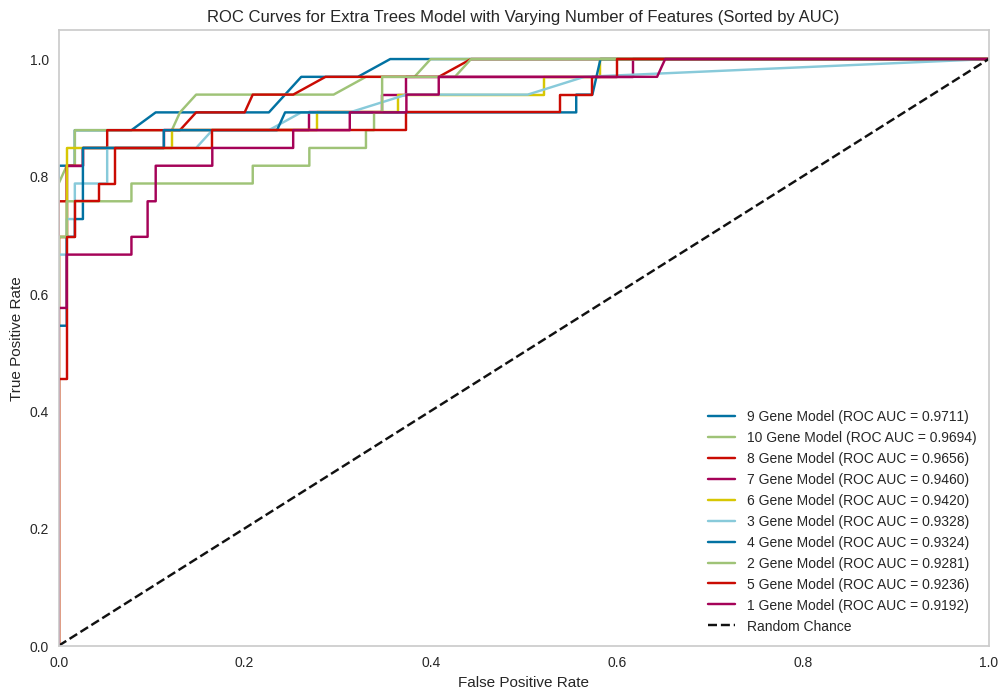

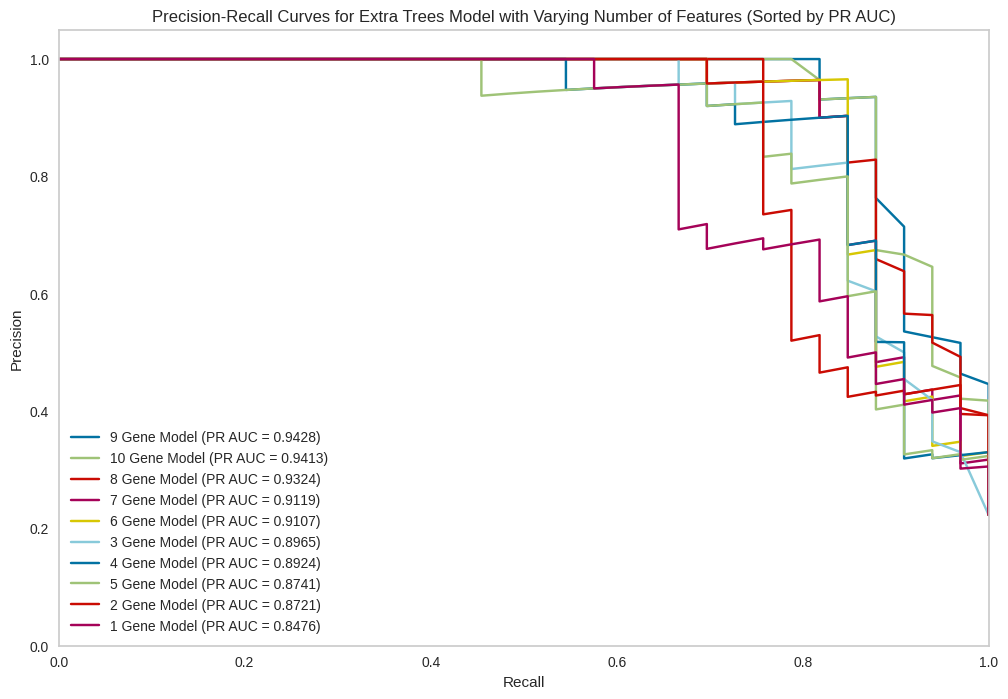

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np

# Initialize cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Initialize lists to store AUC values and feature counts
roc_curves = []  # To store (fpr, tpr, auc, n_features) tuples
pr_curves = []   # To store (precision, recall, pr_auc, n_features) tuples

# Loop over the number of features from 10 down to 1
for n_features in range(10, 0, -1):
    # Select the top n_features from the importance_df
    top_n_features = importance_df.head(n_features).index.tolist()
    X = MPXV_df[top_n_features]  # Data for the top n features
    y = MPXV_df['condition']  # Target variable

    # Build and tune Extra Trees model
    et_model = ExtraTreesClassifier(random_state=123)

    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(et_model, param_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X, y)

    # Best model from GridSearch
    best_et_model = grid_search.best_estimator_

    # Cross-validated predictions
    y_pred_proba_cv = cross_val_predict(best_et_model, X, y, cv=cv, method='predict_proba')[:, 1]

    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba_cv)
    roc_auc = roc_auc_score(y, y_pred_proba_cv)

    # Store ROC curve data
    roc_curves.append((fpr, tpr, roc_auc, n_features))

    # Compute Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y, y_pred_proba_cv)
    pr_auc = auc(recall, precision)

    # Store Precision-Recall curve data
    pr_curves.append((precision, recall, pr_auc, n_features))

# Sort ROC curves by AUC in descending order
roc_curves.sort(key=lambda x: x[2], reverse=True)

# Sort Precision-Recall curves by PR AUC in descending order
pr_curves.sort(key=lambda x: x[2], reverse=True)

# Set up a figure for the ROC curves
plt.figure(figsize=(12, 8))

# Plot ROC curves
for fpr, tpr, auc_value, n_features in roc_curves:
    plt.plot(fpr, tpr, label=f'{n_features} Gene Model (ROC AUC = {auc_value:.4f})')

# Plot formatting for ROC
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.title('ROC Curves for Extra Trees Model with Varying Number of Features (Sorted by AUC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower right', fontsize='small')  # Adjust legend font size
plt.grid()
plt.savefig('roc_curves.pdf')  # Save as PDF
plt.savefig('roc_curves.png')   # Save as PNG
plt.show()

# Set up a figure for the Precision-Recall curves
plt.figure(figsize=(12, 8))

# Plot Precision-Recall curves
for precision, recall, pr_auc, n_features in pr_curves:
    plt.plot(recall, precision, label=f'{n_features} Gene Model (PR AUC = {pr_auc:.4f})')

# Plot formatting for PR
plt.title('Precision-Recall Curves for Extra Trees Model with Varying Number of Features (Sorted by PR AUC)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left', fontsize='small')  # Adjust legend font size
plt.grid()
plt.savefig('pr_curves.pdf')  # Save as PDF
plt.savefig('pr_curves.png')   # Save as PNG
plt.show()


# **Prediction**

In [ ]:
# Finalize the model
final_model = finalize_model(selected_model_2)

In [ ]:
mpxv_pre = top_features_df.drop(columns=['condition'])


In [ ]:
MPXV_pre = pd.read_csv("rna_seq_K_1_C_0.csv", index_col=0)
condition = MPXV_pre.iloc[:, -1]
mpxv_pre = MPXV_pre[['ZNF212', 'RRAD', 'NUP58', 'ZNF266', 'PLAGL1', 'ZNF451', 'ICAM5', 'MSI1', 'CARS1']]

# Correctly select the columns with commas
#mpxv_pre = MPXV_batch[['ICAM5' 'RRAD' 'ZNF451' 'PLAGL1' 'ZNF266']]

#normalized_mpxv_pre = z_score_normalize(mpxv_pre)
#mpxv_pre = normalized_mpxv_pre


In [ ]:
# Make predictions
predictions = predict_model(final_model, data=mpxv_pre)
# View the predictions
print(predictions)
display(predictions.head(20))

                ZNF212         RRAD       NUP58      ZNF266     PLAGL1  \
gene_id                                                                  
GSM6765254   17.686111    68.192375   26.528721   18.630537   8.379782   
GSM6765268   14.966350    68.854103   26.786766   17.342249   7.948828   
GSM6765281   16.891336    72.518944   25.293364   19.540497   7.616769   
GSM6765294  106.264603  2163.899170  201.071823  151.555298  27.983160   
GSM6765307   95.711227  1965.244141  212.243347  152.445084  26.872837   
GSM6765321   84.664307  1949.223877  195.290344  139.179382  26.388048   
GSM6765335   55.170040   478.674957  165.786789   76.532463  33.908394   
GSM6765349   71.196259   558.711121  164.110062   72.050987  27.295532   
GSM6765363   50.973228   429.060089  164.132553   71.798454  27.564112   
GSM6765379   62.804737   631.911987  143.335464  143.834625  22.179821   
GSM6765393   70.707687   612.323364  128.766434  153.160889  29.226355   
GSM6765408   67.006134   704.670410  1

,ZNF212,RRAD,NUP58,ZNF266,PLAGL1,ZNF451,ICAM5,MSI1,CARS1,prediction_label,prediction_score
gene_id,,,,,,,,,,,
GSM6765254,17.686111,68.192375,26.528721,18.630537,8.379782,7.412590,0.831590,0.387095,19.857838,1,0.55
GSM6765268,14.966350,68.854103,26.786766,17.342249,7.948828,8.616676,0.198213,0.338307,18.442991,0,0.59
GSM6765281,16.891336,72.518944,25.293364,19.540497,7.616769,8.370193,0.307345,0.393430,18.965853,0,0.58
GSM6765294,106.264603,2163.899170,201.071823,151.555298,27.983160,26.098354,9.498169,3.741084,193.348648,1,0.73
GSM6765307,95.711227,1965.244141,212.243347,152.445084,26.872837,30.922676,5.201098,7.101738,177.672501,1,0.72
GSM6765321,84.664307,1949.223877,195.290344,139.179382,26.388048,27.114746,7.599825,3.433577,177.017776,1,0.73
GSM6765335,55.170040,478.674957,165.786789,76.532463,33.908394,29.267937,7.751420,19.431608,102.690834,1,0.67
GSM6765349,71.196259,558.711121,164.110062,72.050987,27.295532,24.057432,21.416237,18.798674,102.673813,1,0.67
GSM6765363,50.973228,429.060089,164.132553,71.798454,27.564112,26.183050,17.307600,21.773315,102.366470,1,0.66


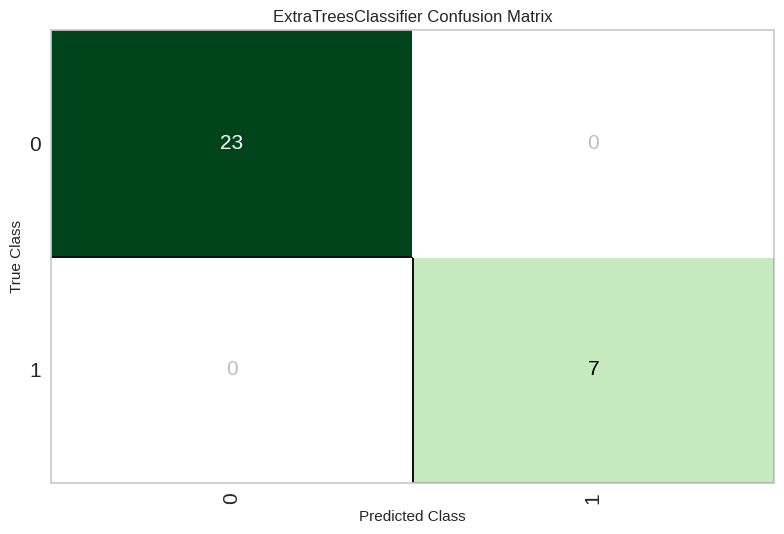

In [ ]:
from pycaret.classification import plot_model
plot_model(final_model, plot='confusion_matrix')


In [ ]:
condition = MPXV_pre.iloc[:, -1].values
display(condition)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'merged_df' is your DataFrame and you've defined 'condition', 'prediction_label'
# Separate the condition column (true labels)
condition = MPXV_pre.iloc[:, -1]

# Make predictions
predictions = predict_model(final_model, data=mpxv_pre)

# Extract the prediction labels and scores
prediction_label = predictions['prediction_label']
prediction_score = predictions['prediction_score']

# Calculate accuracy
accuracy = accuracy_score(condition, prediction_label)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7917


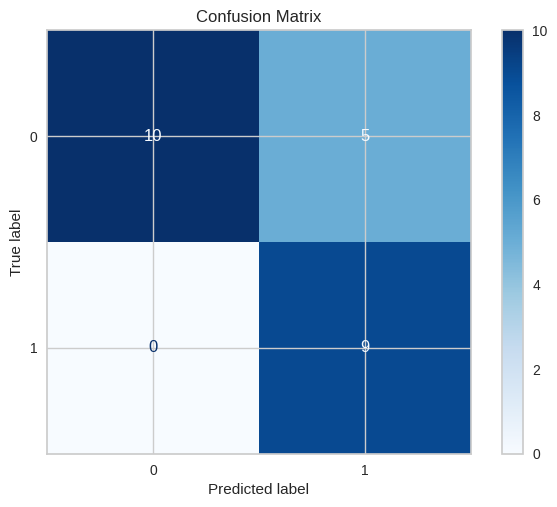

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(condition, prediction_label)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(condition))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


AUC: 0.8333


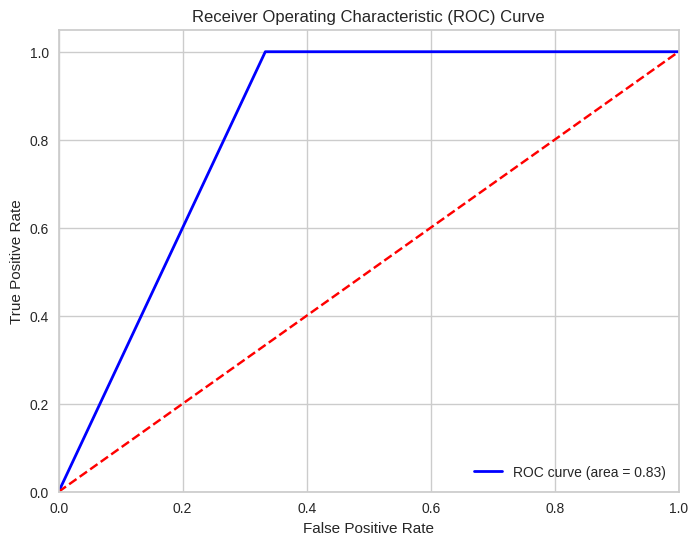

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


condition = MPXV_pre.iloc[:, -1].values

predicted_probabilities = predictions['prediction_label'].values

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(condition, predicted_probabilities, pos_label=1)
roc_auc = auc(fpr, tpr)  # Calculate AUC

# Print the AUC value
print(f"AUC: {roc_auc:.4f}")

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
predictions.to_csv("predictions.csv")